# Đồ án cuối kì môn Lập trình cho Khoa học Dữ liệu - CQ2022/21

## Mục lục
- [I. Thông tin nhóm](#i)
- [II. Thu thập dữ liệu](#ii)
    - [1. Chủ đề](#ii1)
    - [2. Nguồn dữ liệu](#ii2)
    - [3. Cách thu thập](#ii3)
- [III. Khám phá dữ liệu](#iii)
- [IV. Đặt câu hỏi có ý nghĩa và trả lời](#iv)
    - [1. Câu hỏi 1](#iv1)
    - [2. Câu hỏi 2](#iv2)
    - [3. Câu hỏi 3](#iv3)
    - [4. Câu hỏi 4](#iv4)
- [V. Nhận xét quá trình làm đồ án](#v)
    - [1. Thành viên 1](#v1)
    - [2. Thành viên 2](#v2)
    - [3. Thành viên 3](#v3)
    - [4. Ý kiến nhóm](#v4)
- [Tài liệu tham khảo](#tltk)


## I. Thông tin nhóm <a id="i"></a>

| Họ tên                | MSSV              | Công việc | Hoàn thành(%)|
|-----------------------|-------------------|-----------|--------------|
|Nguyễn Tiến Quốc      |   22120300        |           | 100%         |
|Nguyễn Trung Quôc      |   22120301        |           | 100%         |
|Võ Thành Tâm      |   22120324        |           | 100%         |

## II. Thu thập dữ liệu <a id="ii"></a>

### 1. Chủ đề <a id="ii1"></a>

### 2. Nguồn dữ liệu <a id="ii2"></a>

### 3. Cách thu thập <a id="ii3"></a>

## III. Khám phá dữ liệu  <a id="iii"></a>

## IV. Đặt câu hỏi có ý nghĩa và trả lời  <a id="iv"></a>

### 1. Câu hỏi 1 <a id="iv1"></a>

### Những đặc trưng nào ảnh hưởng tới giá cả của laptop? Các thương hiệu nào cung cấp cấu hình cao với giá cả hợp lý nhất?

### Tiền xử lí:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [17]:
df = pd.read_csv('./Dataset/laptop_prices.csv', encoding='Latin-1')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [18]:
# df = pd.read_csv('./Dataset/laptop_price.csv', encoding='Latin-1')
# df.head()

In [19]:
# In ra các loại GPU có trong dữ liệu
df['GPU_model'] = df['GPU_model'].str.lower()
gpu = df['GPU_model'].unique()
gpu

array(['iris plus graphics 640', 'hd graphics 6000', 'hd graphics 620',
       'radeon pro 455', 'iris plus graphics 650', 'radeon r5',
       'iris pro graphics', 'geforce mx150', 'uhd graphics 620',
       'hd graphics 520', 'radeon pro 555', 'radeon r5 m430',
       'hd graphics 615', 'radeon pro 560', 'geforce 940mx',
       'hd graphics 400', 'geforce gtx 1050', 'radeon r2', 'radeon 530',
       'geforce 930mx', 'hd graphics', 'hd graphics 500',
       'geforce 930mx ', 'geforce gtx 1060', 'geforce 150mx',
       'iris graphics 540', 'radeon rx 580', 'geforce 920mx',
       'radeon r4 graphics', 'radeon 520', 'geforce gtx 1070',
       'geforce gtx 1050 ti', 'geforce mx130', 'r4 graphics',
       'geforce gtx 940mx', 'radeon rx 560', 'geforce 920m',
       'radeon r7 m445', 'radeon rx 550', 'geforce gtx 1050m',
       'hd graphics 515', 'radeon r5 m420', 'hd graphics 505',
       'gtx 980 sli', 'r17m-m1-70', 'geforce gtx 1080', 'quadro m1200',
       'geforce 920mx ', 'geforce gtx

In [20]:
# In ra các hãng GPU có trong dữ liệu
df['GPU_company'] = df['GPU_company'].str.lower()
gpu = df['GPU_company'].unique()
gpu

array(['intel', 'amd', 'nvidia', 'arm'], dtype=object)

Các Nhóm Phân Loại GPU:

- Intel Graphics: Bao gồm các GPU như iris plus graphics 640, hd graphics 6000, hd graphics 620, iris plus graphics 650, iris pro graphics, uhd graphics 620, hd graphics 520, hd graphics 615, hd graphics 400, hd graphics, hd graphics 500, iris graphics 540, hd graphics 515, hd graphics 505, iris graphics 550, hd graphics 630, hd graphics 510, hd graphics 405, hd graphics 530, graphics 620, hd graphics 540, hd graphics 5300, hd graphics 620.

- Nvidia GeForce High-End: Bao gồm các GPU dòng GeForce cao cấp như geforce gtx 1050, geforce gtx 1060, geforce gtx 1070, geforce gtx 1050 ti, gtx 980 sli, geforce gtx 1080, geforce gtx 980m, geforce gtx 965m, geforce gtx1080, geforce gtx1050 ti, geforce gtx 970m, geforce gtx 1070m, geforce gtx1060, geforce gtx 1050ti, geforce gtx 980.
- Nvidia GeForce Mid/Low-End: Bao gồm các GPU dòng GeForce tầm trung và thấp như geforce mx150, geforce 940mx, geforce 930mx, geforce 930mx, geforce 150mx, geforce 920mx, geforce 920mx, geforce gtx 940mx, geforce 920m, geforce gtx 940mx, geforce 920m, geforce 920mx, geforce gtx 950m, geforce 930m, geforce gtx 940m, geforce gt 940mx, geforce gtx 960m, geforce gtx 960m, geforce gtx 960, geforce 960m, geforce 920, geforce 940m, geforce gtx 930mx, geforce 960m.

- Nvidia Quadro: Bao gồm các GPU dòng Quadro như quadro m1200, quadro m2200m, quadro m620, quadro m620m, quadro m520m, quadro m2200, quadro m2000m, quadro m1000m, quadro 3000m, quadro m500m, quadro m3000m.

- AMD Radeon High-End: Bao gồm các GPU dòng Radeon cao cấp như radeon pro 455, radeon pro 555, radeon pro 560, radeon rx 580, radeon rx 560, radeon rx 550, radeon rx 540, radeon 540.
- AMD Radeon Mid/Low-End: Bao gồm các GPU dòng Radeon tầm trung và thấp như radeon r5, radeon r2, radeon 530, radeon r5 m430, radeon 520, radeon r7 m445, radeon r5 m420, radeon r5 430, radeon r4 graphics, r4 graphics, radeon r4, radeon r7 m460, radeon r5 520, radeon r7 m440, radeon r7, radeon r7 m365x, radeon r9 m385, radeon r5 m330, radeon r5 m315, radeon r7 m360, radeon r5 m420x, radeon r7 graphics, radeon r7 m465, radeon r3.
- AMD FirePro: Bao gồm các GPU dòng FirePro như firepro w4190m, firepro w5130m, firepro w4190m, firepro w6150m.

- ARM Mali: Bao gồm các GPU như mali t860 mp4.

- Other: Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. (r17m-m1-70)

Phân loại dựa trên: [Trải nghiệm và phân loại](hhttps://gearvn.com/pages/card-man-hinh-va-cac-thong-so-quan-trong-thuong-gap?srsltid=AfmBOorLMB1BfUO6QEKSWWA4ZTSQe_ArrS0tcDE2ESQAzmVhnRQlyzKQ)

In [21]:
def extract_gpu_type(gpu_str):
    if pd.isnull(gpu_str):
        return 'Other'
    
    gpu_str_lower = gpu_str.lower()
    
    # Intel Graphics
    intel_keywords = [
        'hd graphics', 'intel iris', 'uhd graphics',
        'iris plus graphics', 'iris pro graphics', 'iris graphics'
    ]
    if any(keyword in gpu_str_lower for keyword in intel_keywords):
        return 'Intel Graphics'
    
    # Nvidia GeForce High-End
    # Dòng GTX 10xx, GTX 16xx, RTX
    geforce_high_end_patterns = [
        r'geforce\s+gtx\s+10\d0',
        r'geforce\s+gtx\s+16\d0',
        r'geforce\s+rtx',
        r'geforce\s+gtx\s+1070m',
        r'geforce\s+gtx\s+1080',
        r'geforce\s+gtx\s+1060',
        r'geforce\s+gtx\s+1050 ti',
        r'geforce\s+gtx\s+1050m',
        r'geforce\s+gtx\s+980',
        r'geforce\s+gtx\s+980m',
        r'geforce\s+gtx\s+970m',
        r'geforce\s+gtx\s+960m',
        r'geforce\s+gtx\s+965m',
        r'geforce\s+gtx\s+1080m'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in geforce_high_end_patterns):
        return 'Nvidia GeForce High-End'
    
    # Nvidia GeForce Mid/Low-End
    geforce_mid_low_patterns = [
        r'geforce\s+mx\d{3}',
        r'geforce\s+gt\s+940mx',
        r'geforce\s+gtx\s+930mx',
        r'geforce\s+gtx\s+940m',
        r'geforce\s+gtx\s+950m',
        r'geforce\s+gtx\s+960',
        r'geforce\s+920mx',
        r'geforce\s+920m',
        r'geforce\s+930m',
        r'geforce\s+940m',
        r'geforce\s+920',
        r'geforce\s+930mx',
        r'geforce\s+960m',
        r'geforce\s+940mx',
        r'geforce\s+960'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in geforce_mid_low_patterns):
        return 'Nvidia GeForce Mid/Low-End'
    
    # Nvidia Quadro
    if 'quadro' in gpu_str_lower:
        return 'Nvidia Quadro'
    
    # AMD Radeon High-End
    radeon_high_end_patterns = [
        r'radeon\s+rx\s+5\d0',
        r'radeon\s+rx\s+6\d0',
        r'radeon\s+pro\s+455',
        r'radeon\s+pro\s+555',
        r'radeon\s+pro\s+560',
        r'radeon\s+rx\s+580',
        r'radeon\s+rx\s+560',
        r'radeon\s+rx\s+550',
        r'radeon\s+rx\s+540',
        r'radeon\s+540'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in radeon_high_end_patterns):
        return 'AMD Radeon High-End'
    
    # AMD Radeon Mid/Low-End
    radeon_mid_low_patterns = [
        r'radeon\s+r5',
        r'radeon\s+r2',
        r'radeon\s+530',
        r'radeon\s+r5\s+m430',
        r'radeon\s+520',
        r'radeon\s+r7\s+m445',
        r'radeon\s+r5\s+m420',
        r'radeon\s+r5\s+430',
        r'radeon\s+r4\s+graphics',
        r'r4\s+graphics',
        r'radeon\s+r4',
        r'radeon\s+r7\s+m460',
        r'radeon\s+r5\s+520',
        r'radeon\s+r7\s+m440',
        r'radeon\s+r7',
        r'radeon\s+r7\s+m365x',
        r'radeon\s+r9\s+m385',
        r'radeon\s+r5\s+m330',
        r'radeon\s+r5\s+m315',
        r'radeon\s+r7\s+m360',
        r'radeon\s+r5\s+m420x',
        r'radeon\s+r7\s+graphics',
        r'radeon\s+r7\s+m465',
        r'radeon\s+r3'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in radeon_mid_low_patterns):
        return 'AMD Radeon Mid/Low-End'
    
    # AMD FirePro
    if 'firepro' in gpu_str_lower:
        return 'AMD FirePro'
    
    # ARM Mali
    if 'mali' in gpu_str_lower:
        return 'ARM Mali'
    
    # Other
    return 'Other'

# Áp dụng phân loại vào DataFrame
df['GPU_Type'] = df['GPU_model'].apply(extract_gpu_type)
df['GPU_Type'].value_counts()

GPU_Type
Intel Graphics                703
Nvidia GeForce High-End       216
AMD Radeon Mid/Low-End        152
Nvidia GeForce Mid/Low-End    142
Nvidia Quadro                  31
AMD Radeon High-End            16
Other                           9
AMD FirePro                     5
ARM Mali                        1
Name: count, dtype: int64

Cơ sở để gán điểm số cho từng loại GPU: [Bảng xếp hạng card đồ họa](https://tplab.vn/blogs/chia-se-kien-thuc-hay/bang-xep-hang-card-do-hoa-2023)


1. Nvidia GeForce High-End (Điểm: 4):
- Lý Do: Đây là dòng GPU cao cấp của Nvidia, thường được sử dụng cho gaming, thiết kế đồ họa chuyên sâu, và các ứng dụng yêu cầu hiệu năng cao. Các model như GTX 1070, GTX 1080, RTX Series cung cấp hiệu năng vượt trội.

2. AMD Radeon High-End (Điểm: 4):
- Tương tự như Nvidia GeForce cao cấp, AMD Radeon High-End như RX 5700, RX 6800 cung cấp hiệu năng mạnh mẽ cho gaming và các ứng dụng đồ họa nặng.

3. Nvidia Quadro và AMD FirePro (Điểm: 3):
- Các GPU này được thiết kế chuyên dụng cho công việc đồ họa chuyên sâu, xử lý video, và các ứng dụng CAD/CAM. Chúng cung cấp hiệu năng tốt nhưng không dành cho gaming.

4. Nvidia GeForce Mid/Low-End và AMD Radeon Mid/Low-End (Điểm: 2):
- Các GPU này phù hợp với gaming nhẹ, xử lý đồ họa trung bình và các ứng dụng thông thường. Chúng cung cấp hiệu năng vừa phải với mức giá hợp lý.

5. Intel Graphics (Điểm: 1):
- Đây là GPU tích hợp trong CPU, phù hợp với các tác vụ cơ bản như lướt web, xem video, và công việc văn phòng. Hiệu năng thấp hơn so với các GPU rời.

6. ARM Mali (Điểm: 0.5):
- GPU này thường được sử dụng trong các thiết bị di động như tablet và smartphone. Hiệu năng thấp, không phù hợp với các tác vụ đồ họa nặng.

7. Other (Điểm: 1):
- Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. Được gán điểm số mặc định là 1.

In [22]:
# Hàm đánh giá điểm số GPU
def gpu_rank(gpu_type):
    gpu_type_lower = gpu_type.lower()
    
    if 'geforce high-end' in gpu_type_lower or 'radeon high-end' in gpu_type_lower:
        return 4  # GPU cao cấp, hiệu năng cao
    elif 'geforce mid/low-end' in gpu_type_lower or 'radeon mid/low-end' in gpu_type_lower:
        return 2  # GPU trung bình/thấp, hiệu năng vừa
    elif 'quadro' in gpu_type_lower or 'firepro' in gpu_type_lower:
        return 3  # GPU chuyên dụng cho công việc đồ họa, hiệu năng tốt
    elif 'intel graphics' in gpu_type_lower:
        return 1  # GPU tích hợp, hiệu năng thấp
    elif 'arm mali' in gpu_type_lower:
        return 0.5  # GPU ARM, thường dùng trong thiết bị di động, hiệu năng thấp
    else:
        return 1  # Default
df['GPU_Rank'] = df['GPU_Type'].apply(gpu_rank)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,2.3,Core i5,128,0,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,1.8,Core i5,128,0,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,2.5,Core i5 7200U,256,0,SSD,No,intel,hd graphics 620,Intel Graphics,1.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,2.7,Core i7,512,0,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,3.1,Core i5,256,0,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0


In [23]:
# In ra các loại CPU có trong dữ liệu
df['CPU_model'] = df['CPU_model'].str.lower()
cpu = df['CPU_model'].unique()
cpu

array(['core i5', 'core i5 7200u', 'core i7', 'a9-series 9420',
       'core i7 8550u', 'core i5 8250u', 'core i3 6006u', 'core m m3',
       'core i7 7500u', 'core i3 7100u', 'atom x5-z8350',
       'core i5 7300hq', 'e-series e2-9000e', 'core i7 8650u',
       'atom x5-z8300', 'e-series e2-6110', 'a6-series 9220',
       'celeron dual core n3350', 'core i3 7130u', 'core i7 7700hq',
       'ryzen 1700', 'pentium quad core n4200', 'atom x5-z8550',
       'celeron dual core n3060', 'fx 9830p', 'core i7 7560u',
       'e-series 6110', 'core i5 6200u', 'core m 6y75', 'core i5 7500u',
       'core i7 6920hq', 'core i5 7y54', 'core i7 7820hk',
       'xeon e3-1505m v6', 'core i7 6500u', 'e-series 9000e',
       'a10-series a10-9620p', 'a6-series a6-9220', 'core i7 6600u',
       'celeron dual core 3205u', 'core i7 7820hq', 'a10-series 9600p',
       'core i7 7600u', 'a8-series 7410', 'celeron dual core 3855u',
       'pentium quad core n3710', 'a12-series 9720p', 'core i5 7300u',
       'ce

Các nhóm phân loại CPU
- Intel Core i7: Bao gồm các CPU như Intel Core i7-8750H, Intel Core i7-8550U, ...
- Intel Core i5: Bao gồm các CPU như Intel Core i5-8250U, Intel Core i5-7200U, ...
- Intel Core i3: Bao gồm các CPU như Intel Core i3-7100U, Intel Core i3-6006U, ...
- Intel Xeon: Bao gồm các CPU như Intel Xeon E3-1505M, Intel Xeon E3-1535M, ...
- Intel Pentium: Bao gồm các CPU như Intel Pentium N4200, Intel Pentium 4405U, ...
- Intel Celeron: Bao gồm các CPU như Intel Celeron N3350, Intel Celeron N3060, ...
- Intel Atom: Bao gồm các CPU như Intel Atom x5-Z8350, Intel Atom x5-Z8300, ...
- Intel Core M: Bao gồm các CPU như Intel Core M3-7Y30, Intel Core M5-6Y54, ...
- AMD Ryzen: Bao gồm các CPU như AMD Ryzen 7 1700, AMD Ryzen 5 1600, ...
- AMD A-Series: Bao gồm các CPU như AMD A9-9420, AMD A6-9220, ...
- AMD E-Series: Bao gồm các CPU như AMD E2-9000e, AMD E2-6110, ...
- AMD FX-Series: Bao gồm các CPU như AMD FX-9830P, AMD FX-8800P, ...
- AMD FirePro: Bao gồm các CPU như AMD FirePro W4190M, AMD FirePro W5130M, ...
- Samsung Cortex: Bao gồm các CPU như Samsung Cortex A72, Samsung Cortex A53, ...
- Other: Bao gồm các CPU không thuộc các nhóm trên hoặc không rõ ràng.

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.

In [24]:
def extract_cpu_type(cpu_str):
    if pd.isnull(cpu_str):
        return 'Unknown'
    
    cpu_str_lower = cpu_str.lower()

    # Intel Core i7
    if 'core i7' in cpu_str_lower:
        return 'Intel Core i7'
    # Intel Core i5
    elif 'core i5' in cpu_str_lower:
        return 'Intel Core i5'
    # Intel Core i3
    elif 'core i3' in cpu_str_lower:
        return 'Intel Core i3'
    # Intel Xeon
    elif 'xeon' in cpu_str_lower:
        return 'Intel Xeon'
    # Intel Pentium
    elif 'pentium' in cpu_str_lower:
        return 'Intel Pentium'
    # Intel Celeron
    elif 'celeron' in cpu_str_lower:
        return 'Intel Celeron'
    # Intel Atom
    elif 'atom' in cpu_str_lower:
        return 'Intel Atom'
    # Intel Core M
    elif 'core m' in cpu_str_lower:
        return 'Intel Core M'
    # AMD Ryzen
    elif 'ryzen' in cpu_str_lower:
        return 'AMD Ryzen'
    # AMD A-Series
    elif re.search(r'a\d+-series', cpu_str_lower):
        return 'AMD A-Series'
    # AMD E-Series
    elif re.search(r'e\d+-series', cpu_str_lower):
        return 'AMD E-Series'
    # AMD FX-Series
    elif 'fx' in cpu_str_lower:
        return 'AMD FX-Series'
    # AMD FirePro
    elif 'firepro' in cpu_str_lower:
        return 'AMD FirePro'
    # Samsung Cortex
    elif 'cortex' in cpu_str_lower:
        return 'Samsung Cortex'
    else:
        return 'Other'
    
df['CPU_Type'] = df['CPU_model'].apply(extract_cpu_type)
df['CPU_Type'].value_counts()

CPU_Type
Intel Core i7     515
Intel Core i5     423
Intel Core i3     134
Intel Celeron      78
AMD A-Series       45
Intel Pentium      30
Intel Core M       17
Intel Atom         13
Other               9
AMD Ryzen           4
Intel Xeon          4
AMD FX-Series       2
Samsung Cortex      1
Name: count, dtype: int64

Chuyển đổi loại CPU thành điểm số

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.
- Gán điểm số tương ứng cho mỗi loại CPU để đánh giá hiệu năng.
- Đảm bảo rằng tất cả các loại CPU trong danh sách đều được xử lý một cách hợp lý.

Các Nhóm Phân Loại CPU và Điểm Số Đề Xuất:

| Nhóm CPU                | Điểm Số |
|-------------------------|---------|
| Intel Core i3           | 1       |
| Intel Core i5           | 2       |
| Intel Core i7           | 3       |
| Intel Xeon              | 4       |
| Intel Pentium           | 0.6     |
| Intel Celeron           | 0.3     |
| Intel Atom              | 0.5     |
| Intel Core M            | 1       |
| AMD A-Series            | 1       |
| AMD E-Series            | 1       |
| AMD FX-Series           | 1       |
| AMD FirePro             | 2       |
| AMD Ryzen               | 3       |
| Samsung Cortex          | 0.5     |
| Khác (Other)            | 1       |

Điểm số đề xuất dựa vào các cơ sở sau:
- Intel Core M: Dòng CPU này thường được sử dụng trong các thiết bị nhẹ, có hiệu năng vừa phải.
- AMD FirePro: Dòng GPU chuyên dụng của AMD, tương đương với hiệu năng cao hơn so với các dòng A-Series.
- Samsung Cortex: GPU ARM, thường dùng trong các thiết bị di động, hiệu năng thấp hơn so với CPU x86.
- Khác (Other): Các loại CPU không thuộc các nhóm trên hoặc không rõ ràng.

In [25]:
# Hàm đánh giá điểm số CPU
def cpu_rank(cpu_type):
    cpu_type_lower = cpu_type.lower()
    
    if 'intel xeon' in cpu_type_lower:
        return 4
    elif 'intel core i7' in cpu_type_lower:
        return 3
    elif 'intel core i5' in cpu_type_lower:
        return 2
    elif 'intel core i3' in cpu_type_lower:
        return 1
    elif 'intel core m' in cpu_type_lower:
        return 1
    elif 'intel pentium' in cpu_type_lower:
        return 0.6
    elif 'intel atom' in cpu_type_lower:
        return 0.5
    elif 'intel celeron' in cpu_type_lower:
        return 0.3

    elif 'amd ryzen' in cpu_type_lower:
        return 3
    elif 'amd firepro' in cpu_type_lower:
        return 2
    elif 'amd a-series' in cpu_type_lower:
        return 1
    elif 'amd e-series' in cpu_type_lower:
        return 1
    elif 'amd fx-series' in cpu_type_lower:
        return 1

    elif 'samsung cortex' in cpu_type_lower:
        return 0.5
    else:
        return 1  # Default

df['CPU_Rank'] = df['CPU_Type'].apply(cpu_rank)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank,CPU_Type,CPU_Rank
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,128,0,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0,Intel Core i5,2.0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,128,0,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0,Intel Core i5,2.0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,256,0,SSD,No,intel,hd graphics 620,Intel Graphics,1.0,Intel Core i5,2.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,512,0,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0,Intel Core i7,3.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,256,0,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0,Intel Core i5,2.0


In [26]:
df.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
GPU_Type                 object
GPU_Rank                float64
CPU_Type                 object
CPU_Rank                float64
dtype: object

In [27]:
# Tính điểm cấu hình tổng thể
df['Config_Score'] = df['CPU_Rank'] * df['CPU_freq'] + df['Ram'] + df['GPU_Rank']

# Tính chỉ số "Giá trị cấu hình" = Config_Score / Price_euros
df['Value_Score'] = df['Config_Score'] / df['Price_euros']

Các công thức trên là các phép tính đơn giản và giả định rằng các yếu tố như CPU, RAM, và GPU đều đóng góp tuyến tính vào điểm cấu hình tổng thể. Trong thực tế, sự tương tác giữa các thành phần phần cứng có thể phức tạp hơn.

Trong Config_Score, CPU có trọng số cao hơn (do nhân với CPU_GHz) so với RAM và GPU. Tùy thuộc vào nhu cầu sử dụng (chơi game, văn phòng, :>), có thể điều chỉnh trọng số để phản ánh tầm quan trọng thực tế của từng thành phần.

Lưu ý:

Các yếu tố như chất lượng xây dựng, thời lượng pin, trọng lượng, hệ điều hành, và các tính năng khác cũng ảnh hưởng đến quyết định mua sắm nhưng không được tính trong Config_Score và Value_Score.

GPU_Rank có thể cần được điều chỉnh để phản ánh đúng hiệu năng thực tế của từng loại GPU. Ví dụ, các GPU chuyên dụng như Nvidia Quadro có thể cần điểm cao hơn so với các GPU GeForce mid-range nếu mục tiêu là phân tích về công việc đồ họa chuyên sâu.

In [28]:
# Chỉ lấy các thương hiệu chính (số lượng mẫu > 2) -> có thể tùy chỉnh
brand_counts = df['Company'].value_counts()
top_brands = brand_counts[brand_counts > 2].index.tolist()
df_top = df[df['Company'].isin(top_brands)]

df_top.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank,CPU_Type,CPU_Rank,Config_Score,Value_Score
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0,Intel Core i5,2.0,13.6,0.010152
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0,Intel Core i5,2.0,12.6,0.014017
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,SSD,No,intel,hd graphics 620,Intel Graphics,1.0,Intel Core i5,2.0,14.0,0.024348
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0,Intel Core i7,3.0,28.1,0.011074
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0,Intel Core i5,2.0,15.2,0.008428


### Trực quan hóa:

Tìm ra những đặc trưng ảnh hưởng tới giá cả của laptop

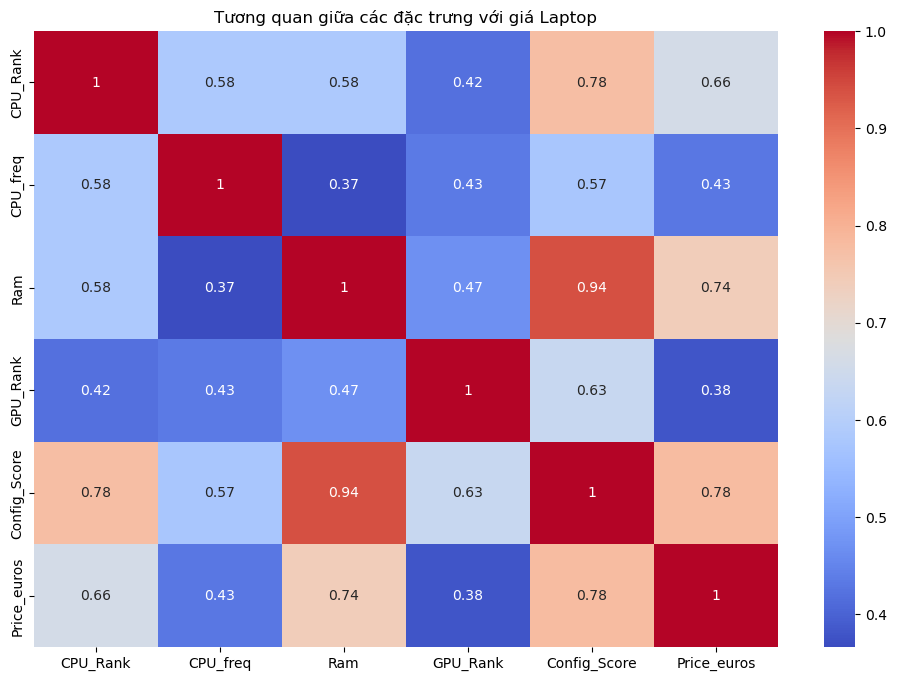

In [29]:

plt.figure(figsize=(12, 8))
sns.heatmap(df[['CPU_Rank', 'CPU_freq', 'Ram', 'GPU_Rank', 'Config_Score', 'Price_euros']].corr(), annot=True, cmap='coolwarm')
plt.title('Tương quan giữa các đặc trưng với giá Laptop')
plt.show()

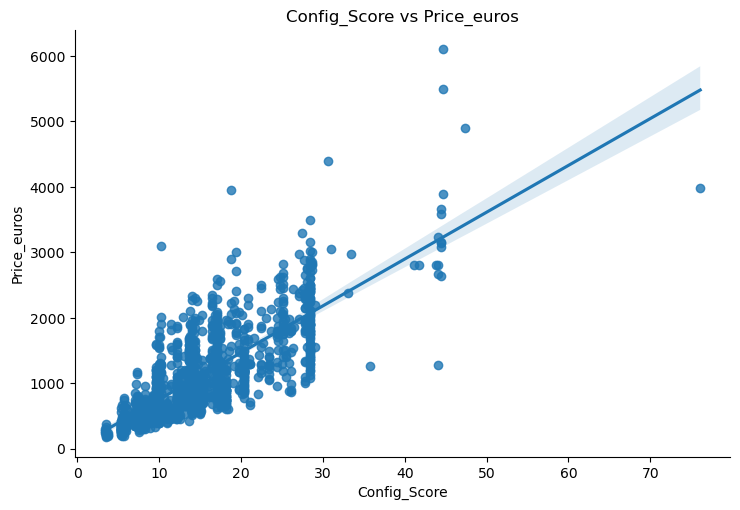

In [30]:
sns.lmplot(x='Config_Score', y='Price_euros', data=df, aspect=1.5)
plt.title('Config_Score vs Price_euros')
plt.show()

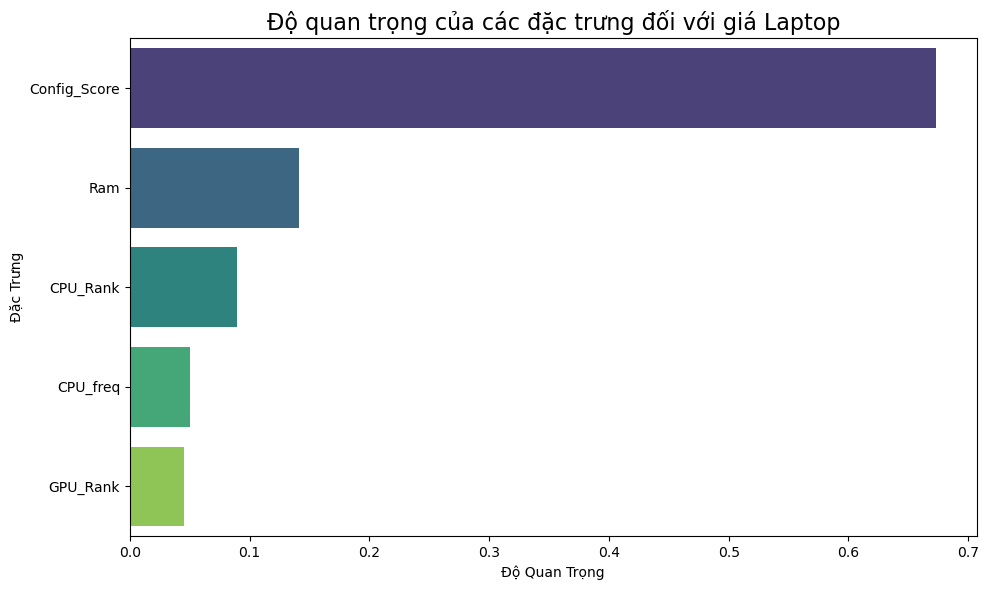

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Feature Importance
features = ['CPU_Rank', 'CPU_freq', 'Ram', 'GPU_Rank', 'Config_Score']
X = df[features]
y = df['Price_euros']

# Khởi tạo và huấn luyện mô hình
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Tạo DataFrame cho feature importances để dễ dàng vẽ
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    hue='Feature',
    palette='viridis',
    dodge=False
)
plt.title('Độ quan trọng của các đặc trưng đối với giá Laptop', fontsize=16)
plt.xlabel('Độ Quan Trọng')
plt.ylabel('Đặc Trưng')
plt.legend([], [], frameon=False)  # Ẩn legend
plt.tight_layout()
plt.show()

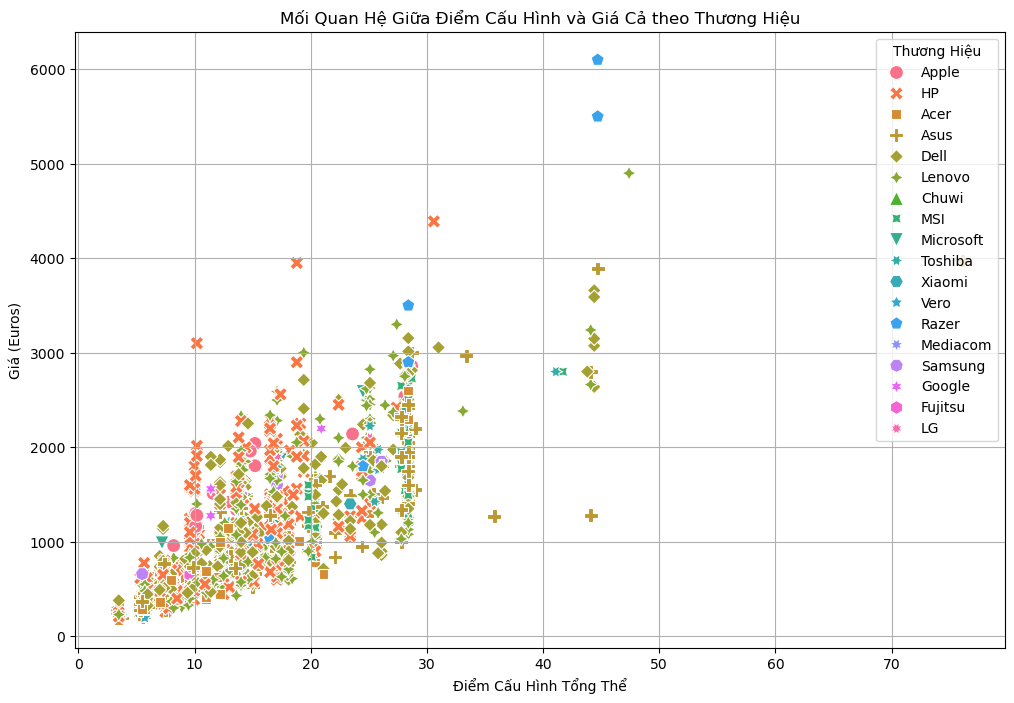

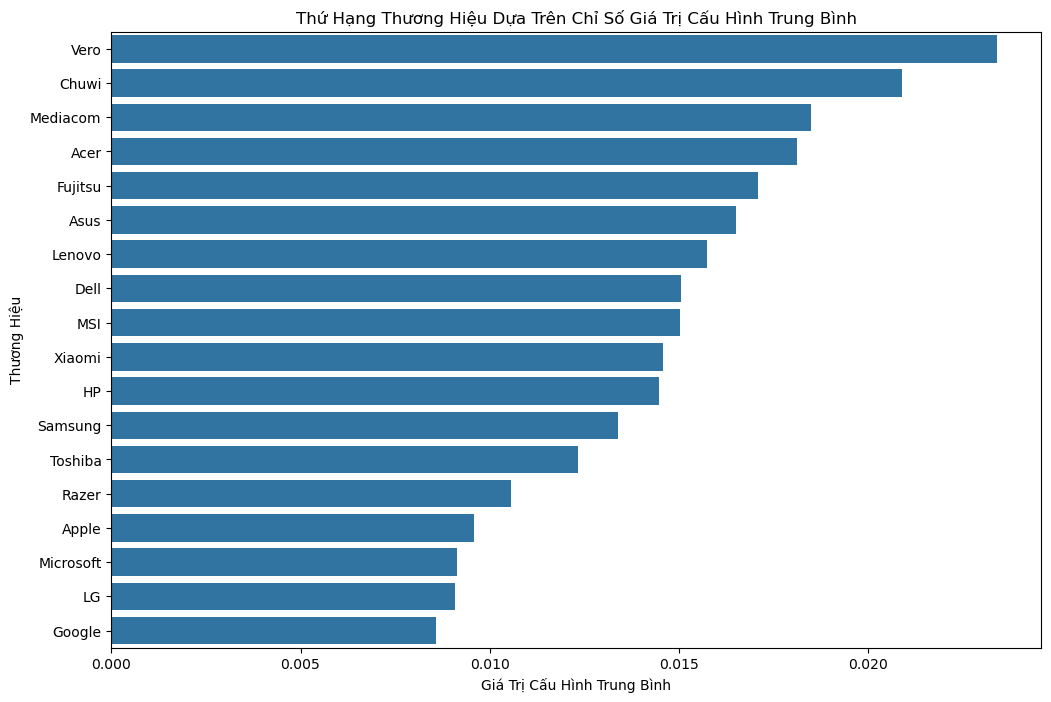

In [33]:
# 1. Biểu đồ Scatter: Config_Score vs Price_euros cho từng thương hiệu
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top, x='Config_Score', y='Price_euros', hue='Company', style='Company', s=100)
plt.title('Mối Quan Hệ Giữa Điểm Cấu Hình và Giá Cả theo Thương Hiệu')
plt.xlabel('Điểm Cấu Hình Tổng Thể')
plt.ylabel('Giá (Euros)')
plt.legend(title='Thương Hiệu')
plt.grid(True)
plt.show()

# 2. Biểu đồ Bar: Thứ hạng các thương hiệu dựa trên chỉ số "Giá trị cấu hình" trung bình
value_score_mean = df_top.groupby('Company')['Value_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=value_score_mean.values, y=value_score_mean.index)
plt.title('Thứ Hạng Thương Hiệu Dựa Trên Chỉ Số Giá Trị Cấu Hình Trung Bình')
plt.xlabel('Giá Trị Cấu Hình Trung Bình')
plt.ylabel('Thương Hiệu')
plt.show()

### 2. Câu hỏi 2 <a id="iv2"></a>

### 3. Câu hỏi 3 <a id="iv3"></a>

### 4. Câu hỏi 4 (bonus) <a id="iv4"></a>

## V. Nhận xét quá trình làm đồ án  <a id="v"></a>

### 1. Thành viên 1  <a id="v1"></a>

### 2. Thành viên 2  <a id="v2"></a>

### 3. Thành viên 3  <a id="v3"></a>

### 4. Ý kiến nhóm  <a id="v4"></a>

Nếu có thêm thời gian thì làm gì?

## Tài liệu tham khảo  <a id="tltk"></a>